In [18]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pingouin as pg

# Create the data
dataframe = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4),
                          'Oil': np.tile([1, 2, 3, 4], 5),
                          'Mileage': [36, 38, 30, 29,
                                      34, 38, 30, 29,
                                      34, 28, 38, 32,
                                      38, 34, 20, 44,
                                      26, 28, 34, 50]})

dataframe

,Cars,Oil,Mileage
0,1,1,36
1,1,2,38
2,1,3,30
3,1,4,29
4,2,1,34
5,2,2,38
6,2,3,30
7,2,4,29
8,3,1,34
9,3,2,28


### **Hypotheses**

$\text{H}_{0}: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{5}$

The mean in between the within-subject factors are equal.

$\text{H}_{A}: \mu_{1} \neq \mu_{2} \neq \mu_{3} \neq \mu_{4} \neq \mu_{5}$

The mean in between the within-subject factors are not equal.

### **Assumptions:**

* Assumption #1: You have one dependent variable that is measured at the continuous level (i.e., it
is measured at the interval or ratio level).

Remark: Failed - The Mileage is recorded at Discrete.

* Assumption #2: You have one within-subjects factor that consists of three or more categorical
levels.

Remark: Passed - The Within-subjects facor is Oil with 1-5 variability.

<function matplotlib.pyplot.show(close=None, block=None)>

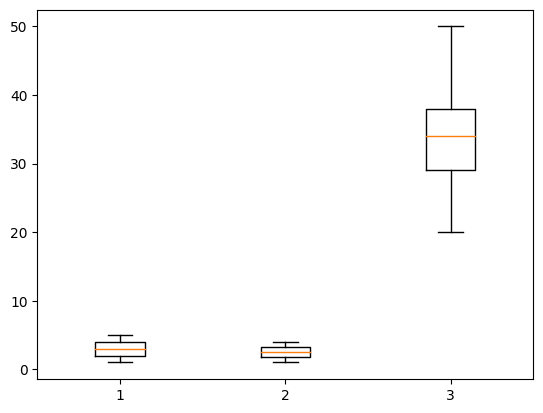

In [11]:
plt.boxplot(dataframe)
plt.show

* Assumptions #3: There should be no significant outliers in the three or more levels of the within-
subjects factor

Remark: Passed - No significant outliers were flagged on the third box.

In [13]:
stat, p = shapiro(dataframe['Mileage'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.959, p=0.523


* Assumptions #4: The distribution of the dependent variable in the three or more levels of the
within-subjects factor should be approximately normally distributed.

Remark: Passed - With a p-value = 0.523, the data is normally distributed.

In [20]:
sphericity_test = pg.sphericity(dataframe, dv='Mileage', within='Oil', subject='Cars')

print(sphericity_test)

SpherResults(spher=True, W=0.28740984224030364, chi2=3.3941920525834335, dof=5, pval=0.6589629981191091)


* Assumptions #5: The variances of the differences between all combinations of levels of the
within-subjects factor must be equal (known as the assumption of sphericity).

Remark: Passed - The p-value garnered is 0.659, which is greater than 0.05.

### **ANOVA Computation**

In [29]:
anova = AnovaRM(dataframe, depvar = 'Mileage',
                subject = 'Cars',
                within = ['Oil'])
res = anova.fit()
print(res)

              Anova
    F Value Num DF  Den DF Pr > F
---------------------------------
Oil  0.5679 3.0000 12.0000 0.6466



In [30]:
posthoc = pg.pairwise_gameshowell(data = dataframe,
                                  dv = 'Mileage',
                                  between = 'Oil')
print(posthoc)

   A  B  mean(A)  mean(B)  diff        se         T        df      pval  \
0  1  2     33.6     33.2   0.4  3.033150  0.131876  7.927469  0.999109   
1  1  3     33.6     30.4   3.2  3.622154  0.883452  7.055614  0.813623   
2  1  4     33.6     36.8  -3.2  4.764452 -0.671641  5.708996  0.903965   
3  2  3     33.2     30.4   2.8  3.741657  0.748331  7.418398  0.874781   
4  2  4     33.2     36.8  -3.6  4.855924 -0.741362  6.025103  0.877191   
5  3  4     30.4     36.8  -6.4  5.244044 -1.220432  7.134212  0.634204   

     hedges  
0  0.075334  
1  0.504672  
2 -0.383675  
3  0.427484  
4 -0.423503  
5 -0.697172  


### **Reporting**

One-way repeated measures was conducted to check whether different Oils have significant effect on the Mileage of cars participating in the study.

During assumption checks, the dataset failed the first one, which is the continuity of the data as they are recorded discretely. However, it passed the 2nd assumption as it has three or more within-subjects factor (1, 2, 3, 4, and 5). The dataset also shows no significant outliers via the boxpot method. When testing for normality, the dataset garnered a p-value of 0.523 via Shapiro-Wilk's Test while a p-value of 0.659 from the pingouin's sphericity test, whoch further passed the dataset.

The ANOVA resulted to a p-value of 0.6446, indicating that there is no significant difference when choosing Oil for the Mileage.

The Post-Hoc Test further proves the it is insiginificant as there are no significant interactons between the within-subject factors.

Therefore, this study has insufficient proof to reject the null hypothesis.